In [501]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd


In [502]:
data =  pd.read_csv("melb_data.csv")
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [503]:
#remove redundant and irrelevant attributes:
#Address has 13378 unique values, almost unique for each object. Description rather than category, also overlaps with latitude, longitude, regionname
#method simply describes if property was put on auction or sold
data['Address'].value_counts()

1/1 Clarendon St    3
13 Robinson St      3
2 Bruce St          3
5 Margaret St       3
5 Charles St        3
                   ..
198 Poath Rd        1
4/3 Eildon Ct       1
166 Gordon St       1
18 Avoca St         1
89 Pearson St       1
Name: Address, Length: 13378, dtype: int64

In [504]:
#remove redundant and irrelevant attributes:
#postcode is redundant
data['Postcode'].value_counts()

3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
         ... 
3775.0      1
3765.0      1
3115.0      1
3431.0      1
3756.0      1
Name: Postcode, Length: 198, dtype: int64

In [505]:
#remove redundant and irrelevant attributes:
#method simply describes how the data is obtained (sold, auction), is irrelevant
data = data.drop(columns=['Address','Method','Postcode'])

In [506]:
#data cleaning: checking for duplicates
data.duplicated().sum()

0

In [507]:
#data cleaning: missing values
data.isna().sum()
#missing values for car can be removed as very few, buildingarea, yearbuilt, councilarea needs replacement

Suburb              0
Rooms               0
Type                0
Price               0
SellerG             0
Date                0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [508]:
#data cleaning: missing values
data = data.dropna(subset=['Car'])
data.reset_index(drop=True, inplace=True)
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median())
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())
data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])

In [509]:
#data transformation: yearbuilt to age
data['BuildingAge'] = 2018-data['YearBuilt']
data = data.drop(columns=['YearBuilt'])

In [527]:
#encoding categorical attributes
#suburb is nominal, has high cardinality with 314 categories - hashing used
categorical = ['Suburb','Type','SellerG','CouncilArea','Regionname']
for x in categorical:
    print(data[x].value_counts())

Reservoir         359
Richmond          259
Bentleigh East    249
Preston           239
Brunswick         221
                 ... 
Monbulk             1
Attwood             1
Wallan              1
Montrose            1
Bullengarook        1
Name: Suburb, Length: 314, dtype: int64
h    9389
u    3015
t    1114
Name: Type, dtype: int64
Nelson                   1558
Jellis                   1303
hockingstuart            1160
Barry                    1010
Ray                       701
                         ... 
Naison                      1
Ace                         1
hockingstuart/Village       1
Crane                       1
Bowman                      1
Name: SellerG, Length: 268, dtype: int64
Moreland             2470
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbou

In [525]:
#encoding categorical attributes
#suburb
from sklearn.feature_extraction import FeatureHasher
hasher = FeatureHasher(n_features=14, input_type='string')
suburb_encoded = hasher.transform(data['Suburb'])
columns = []
for x in range(0, 14):
    columns.append('Suburb'+str(x))
suburb_encoded = pd.DataFrame(suburb_encoded.toarray(), columns=columns)
#type
data['Type'].value_counts()


h    9389
u    3015
t    1114
Name: Type, dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'Rooms'),
  Text(2, 0, 'Price'),
  Text(3, 0, 'Distance'),
  Text(4, 0, 'Bedroom2'),
  Text(5, 0, 'Bathroom'),
  Text(6, 0, 'Car'),
  Text(7, 0, 'Landsize'),
  Text(8, 0, 'BuildingArea'),
  Text(9, 0, 'Lattitude'),
  Text(10, 0, 'Longtitude'),
  Text(11, 0, 'Propertycount'),
  Text(12, 0, 'BuildingAge')])

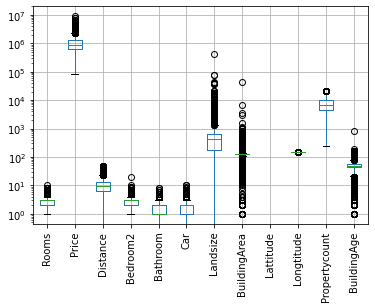

In [390]:
#data transformation: standardization as data contains many outliers
data.boxplot()
plt.yscale("log")
plt.xticks(rotation=90)

In [391]:
#as data contains many outliers, standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = data.copy()
numeric_columns = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','BuildingAge','Lattitude','Longtitude','Propertycount']
data_scaled[numeric_columns] = scaler.fit_transform(data_scaled[numeric_columns])